In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER
import os,errno
import sys
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import pandas as pd
import datetime as dt
from scipy.ndimage.measurements import label
from math import sin, cos, sqrt, atan2, radians
import geopy.distance
%matplotlib inline

dir2='/thorncroftlab_rit/ahenny/rain/'
dir1='/thorncroftlab_rit/ahenny/rain/US/ghcnd_all/'
dir='/thorncroftlab_rit/ahenny/rain/DISSERTATION_SCRIPTS_RESULTS/'

#Finds dates associated with each weather type and plots composites

In [ ]:
season='spring'
thresh_choose=99
area_threshold_choose=80
season_choose=season

ds=xr.open_dataset(dir+'extreme_days_ghcnd_'+str(thresh_choose)+'_'+str(area_threshold_choose)+'_'+season_choose+'.nc')

lats=ds['lats'].values.tolist()
lons=ds['lons'].values.tolist()
lons=[x+360. for x in lons]
dates=ds['dates'].values
dates_unique=list(set(dates))
dates_unique=pd.DatetimeIndex(dates_unique).sort_values()
stations=ds['stations'].values.tolist()
obs=ds['obs'].values.tolist()
years=[x.year for x in dates_unique]
print(dates_unique)
yrs_neusa=np.arange(1979,2020,1)

lon_range=np.arange(-115,-30,0.25)
lat_range=np.arange(15,60,0.25)

ds1=xr.open_dataset(dir+'era_5_annual_ivtx_neusa.nc')
print(ds1)
ivtx=ds1['p71.162'].sel(latitude=lat_range,longitude=lon_range)

ds2=xr.open_dataset(dir+'era_5_annual_ivty_neusa.nc')
ivty=ds2['p72.162'].sel(latitude=lat_range,longitude=lon_range)

ds3=xr.open_dataset(dir+'era_5_annual_z1000_neusa.nc')
z_1000=ds3.z.sel(latitude=lat_range,longitude=lon_range)

ds6=xr.open_dataset(dir+'era_5_annual_z500_neusa.nc')
z_500=ds6.z.sel(latitude=lat_range,longitude=lon_range)

ds5=xr.open_dataset(dir+'era_5_annual_mslp_neusa.nc')
slp=ds5['msl'].sel(latitude=lat_range,longitude=lon_range)

ds4=xr.open_dataset(dir+'neusa_ep_days_stats_seasonal_ep_days_'+season+'.nc')

ar_yesno4=ds4['ar_yesno'].values.tolist()
ivt_yesno4=ds4['ivt_yesno'].values.tolist()
tc_yesno4=ds4['tc_yesno'].values.tolist()
other_yesno4=ds4['other_yesno'].values.tolist()
tc_linked_ar_yesno4=ds4['tc_linked_ar_yesno'].values.tolist()
tc_linked_ivt_yesno4=ds4['tc_linked_ivt_yesno'].values.tolist()
tc_remnant_linked_ivt_yesno4=ds4['tc_remnant_linked_ivt_yesno'].values.tolist()
tc_remnant_ar_combo_yesno4=ds4['tc_remnant_ar_combo_yesno'].values.tolist()
tc_remnant_linked_ar_yesno4=ds4['tc_remnant_linked_ar_yesno'].values.tolist()
tc_remnants_yesno4=ds4['tc_remnants_yesno'].values.tolist()
tc_ar_combo_yesno4=ds4['tc_ar_combo_yesno'].values.tolist()

print(sum(ar_yesno4))

In [ ]:
zipped_t1=list(zip(dates_unique,ar_yesno4))#ar-related = green
zipped_t2=list(zip(dates_unique,tc_linked_ar_yesno4))
zipped_t3=list(zip(dates_unique,tc_remnant_linked_ar_yesno4))
zipped_t4=list(zip(dates_unique,tc_yesno4))#tc-related = blue
zipped_t5=list(zip(dates_unique,tc_ar_combo_yesno4))
zipped_t6=list(zip(dates_unique,tc_remnant_ar_combo_yesno4))
zipped_t7=list(zip(dates_unique,tc_remnants_yesno4))
zipped_t8=list(zip(dates_unique,ivt_yesno4))#other IVT-related = grey
zipped_t9=list(zip(dates_unique,tc_linked_ivt_yesno4))
zipped_t10=list(zip(dates_unique,tc_remnant_linked_ivt_yesno4))
zipped_t11=list(zip(dates_unique,other_yesno4))#unspecified = brown

dates_t1=[x[0] for x in zipped_t1 if x[1]==1]
dates_t2=[x[0] for x in zipped_t2 if x[1]==1]
dates_t3=[x[0] for x in zipped_t3 if x[1]==1]
dates_t4=[x[0] for x in zipped_t4 if x[1]==1]
dates_t5=[x[0] for x in zipped_t5 if x[1]==1]
dates_t6=[x[0] for x in zipped_t6 if x[1]==1]
dates_t7=[x[0] for x in zipped_t7 if x[1]==1]
dates_t8=[x[0] for x in zipped_t8 if x[1]==1]
dates_t9=[x[0] for x in zipped_t9 if x[1]==1]
dates_t10=[x[0] for x in zipped_t10 if x[1]==1]
dates_t11=[x[0] for x in zipped_t11 if x[1]==1]

dates_t1=[pd.to_datetime(x)+dt.timedelta(hours=12) for x in dates_t1]
dates_t2=[pd.to_datetime(x)+dt.timedelta(hours=12) for x in dates_t2]
dates_t3=[pd.to_datetime(x)+dt.timedelta(hours=12) for x in dates_t3]
dates_t4=[pd.to_datetime(x)+dt.timedelta(hours=12) for x in dates_t4]
dates_t5=[pd.to_datetime(x)+dt.timedelta(hours=12) for x in dates_t5]
dates_t6=[pd.to_datetime(x)+dt.timedelta(hours=12) for x in dates_t6]
dates_t7=[pd.to_datetime(x)+dt.timedelta(hours=12) for x in dates_t7]
dates_t8=[pd.to_datetime(x)+dt.timedelta(hours=12) for x in dates_t8]
dates_t9=[pd.to_datetime(x)+dt.timedelta(hours=12) for x in dates_t9]
dates_t10=[pd.to_datetime(x)+dt.timedelta(hours=12) for x in dates_t10]
dates_t11=[pd.to_datetime(x)+dt.timedelta(hours=12) for x in dates_t11]

dates_ar=dates_t1+dates_t2+dates_t3
dates_tc=dates_t4+dates_t5+dates_t6+dates_t7
dates_other=dates_t8+dates_t9+dates_t10+dates_t11

dates_tc=pd.DatetimeIndex(dates_tc)
dates_tc_first=[x for x in dates_tc if x.year<=1999]
dates_tc_second=[x for x in dates_tc if x.year>=2000]
print(dates_tc_first)

dates_unique_first=[x for x in dates_unique if x.year<=1999]
dates_unique_second=[x for x in dates_unique if x.year>=2000]

dates_ar=pd.DatetimeIndex(dates_ar)
dates_ar_first=[x for x in dates_ar if x.year<=1999]
dates_ar_second=[x for x in dates_ar if x.year>=2000]

print(dates_t1)
print(dates_t2)
print(dates_t3)
print(dates_t4)
print(dates_t5)
print(dates_t6)
print(dates_t7)
print(dates_t8)
print(dates_t9)
print(dates_t10)
print(dates_t11)

print(dates_tc)
print(dates_ar)
print(dates_other)

In [ ]:
dates_choose=dates_t1
print(dates_choose)
print(len(dates_choose))
ivtx_sel=ivtx.sel(time=dates_choose)
ivty_sel=ivty.sel(time=dates_choose)
ivt_mag_sel=np.sqrt(ivtx_sel**2+ivty_sel**2)
#u_850_sel=u_850.sel(time=dates_choose)
#v_850_sel=v_850.sel(time=dates_choose)
z_1000_sel=z_1000.sel(time=dates_choose)
z_500_sel=z_500.sel(time=dates_choose)
thickness_sel=z_500_sel-z_1000_sel
slp_sel=slp.sel(time=dates_choose)
ivt_mean=ivt_mag_sel.mean(dim='time',skipna=True)
#u_mean=u_850_sel.mean(dim='time',skipna=True)
#v_mean=v_850_sel.mean(dim='time',skipna=True)
slp_mean=slp_sel.mean(dim='time',skipna=True)
thickness_mean=thickness_sel.mean(dim='time',skipna=True)
print(thickness_sel)

In [40]:
#to draw grid lines on Lambert Conformal projection; 
#CREDIT ajdawson on GitHub https://gist.github.com/ajdawson/dd536f786741e987ae4e

from copy import copy
import shapely.geometry as sgeom
def find_side(ls, side):
    """
    Given a shapely LineString which is assumed to be rectangular, return the
    line corresponding to a given side of the rectangle.
    
    """
    minx, miny, maxx, maxy = ls.bounds
    points = {'left': [(minx, miny), (minx, maxy)],
              'right': [(maxx, miny), (maxx, maxy)],
              'bottom': [(minx, miny), (maxx, miny)],
              'top': [(minx, maxy), (maxx, maxy)],}
    return sgeom.LineString(points[side])


def lambert_xticks(ax, ticks):
    """Draw ticks on the bottom x-axis of a Lambert Conformal projection."""
    te = lambda xy: xy[0]
    lc = lambda t, n, b: np.vstack((np.zeros(n) + t, np.linspace(b[2], b[3], n))).T
    xticks, xticklabels = _lambert_ticks(ax, ticks, 'bottom', lc, te)
    ax.xaxis.tick_bottom()
    ax.set_xticks(xticks)
    ax.set_xticklabels([ax.xaxis.get_major_formatter()(xtick) for xtick in xticklabels])
    

def lambert_yticks(ax, ticks):
    """Draw ricks on the left y-axis of a Lamber Conformal projection."""
    te = lambda xy: xy[1]
    lc = lambda t, n, b: np.vstack((np.linspace(b[0], b[1], n), np.zeros(n) + t)).T
    yticks, yticklabels = _lambert_ticks(ax, ticks, 'left', lc, te)
    ax.yaxis.tick_left()
    ax.set_yticks(yticks)
    ax.set_yticklabels([ax.yaxis.get_major_formatter()(ytick) for ytick in yticklabels])
def _lambert_ticks(ax, ticks, tick_location, line_constructor, tick_extractor):
    """Get the tick locations and labels for an axis of a Lambert Conformal projection."""
    outline_patch = sgeom.LineString(ax.outline_patch.get_path().vertices.tolist())
    axis = find_side(outline_patch, tick_location)
    n_steps = 30
    extent = ax.get_extent(ccrs.PlateCarree())
    _ticks = []
    for t in ticks:
        xy = line_constructor(t, n_steps, extent)
        proj_xyz = ax.projection.transform_points(ccrs.Geodetic(), xy[:, 0], xy[:, 1])
        xyt = proj_xyz[..., :2]
        ls = sgeom.LineString(xyt.tolist())
        locs = axis.intersection(ls)
        if not locs:
            tick = [None]
        else:
            tick = tick_extractor(locs.xy)
        _ticks.append(tick[0])
    # Remove ticks that aren't visible:    
    ticklabels = copy(ticks)
    while True:
        try:
            index = _ticks.index(None)
        except ValueError:
            break
        _ticks.pop(index)
        ticklabels.pop(index)
    return _ticks, ticklabels

In [ ]:
if 1==0:
    dsa=xr.open_dataset(dir+'neusa_ar_climo_fall.nc')
    ar=dsa.ar
    tc_trop=dsa.tc_trop
    tc_nontrop=dsa.tc_nontrop
    labeled=dsa.labeled
print(season)
print(dates_choose)
if 1==1:
    dsa=xr.open_dataset(dir+'neusa_ar_points_'+season+'_var95const.nc')
    dsa['longitude']=dsa.longitude
    ar=dsa.ar
    tc_trop=dsa.tc_trop
    tc_nontrop=dsa.tc_nontrop
    labeled=dsa.labeled

In [42]:
ar_sel=ar.sel(time=dates_choose).fillna(0)
ar_mean=ar_sel.mean(dim='time',skipna=True)
ar_mean=ar_mean.where(ar_mean>=0.5)
ar_mean=ar_mean/ar_mean
ar_mean['longitude']=ar_mean.longitude.values-360

/kt11/ktyle/anaconda3_2001/envs/jun20/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.


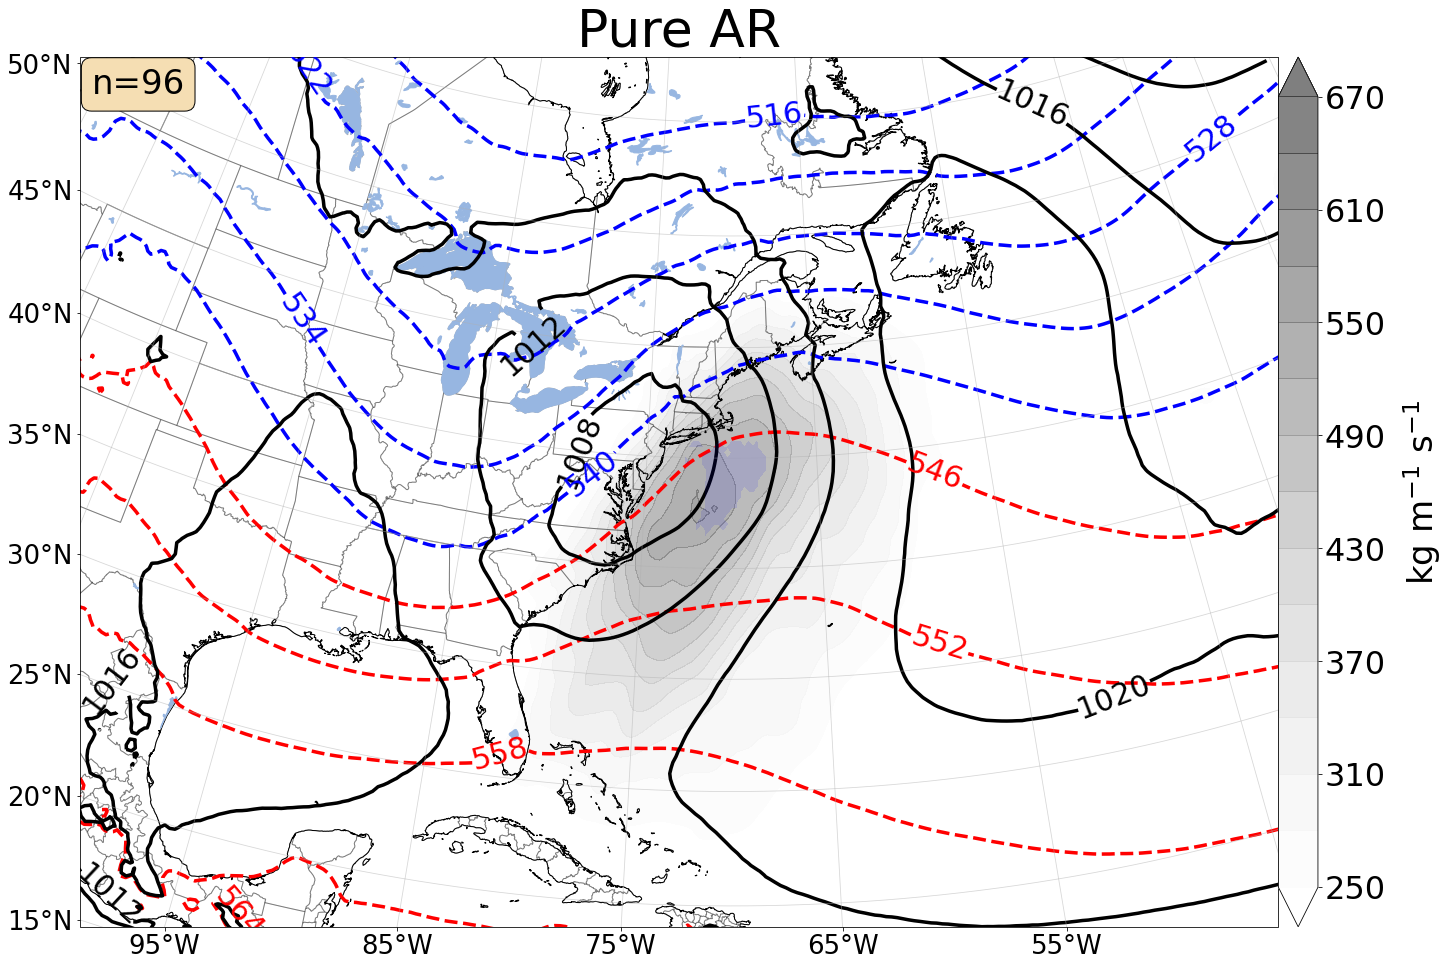

In [45]:
import matplotlib as mpl
month_dict={'1':'January','2':'February','3':'March','4':'April','5':'May','6':'June','7':'July','8':'August','9':'September','10':'October','11':'November','12':'December'}    
clon=-70
clat=35
proj_map = ccrs.LambertConformal(central_longitude=clon, central_latitude=clat)
fig = plt.figure(figsize=(24,16))
ax=plt.subplot(1,1,1,projection=proj_map)
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.STATES.with_scale('10m'),alpha=0.3)
ax.add_feature(cfeature.LAKES.with_scale('50m'))
countries = cfeature.NaturalEarthFeature(category='cultural',name='admin_0_boundary_lines_land',scale='50m',facecolor='none')
ax.add_feature(countries)
ax.set_extent([-100,-45,19,55],crs=ccrs.PlateCarree())

# *must* call draw in order to get the axis boundary used to add ticks:
fig.canvas.draw()

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = [-135,-130,-125,-120,-115,-110,-105,-95,-85,-75,-65,-55,-45,-40,-35,-30,-25,-20]
yticks = [5,10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
ax.gridlines(xlocs=xticks, ylocs=yticks,alpha=0.5)
ax.tick_params(labelsize=26)
# Label the end-points of the gridlines using the custom tick makers:
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
lambert_xticks(ax, xticks)
lambert_yticks(ax, yticks)

cax1=ax.contourf(ivt_mean.longitude,ivt_mean.latitude,ivt_mean,levels=np.arange(250,700,30),extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.Greys,alpha=0.5)
cbar=plt.colorbar(cax1,pad=0,fraction=0.046)

X=8
#q=ax.quiver(u_mean.longitude[0::X].values,u_mean.latitude[0::X].values,u_mean[0::X,0::X].values,v_mean[0::X,0::X].values,transform=ccrs.PlateCarree(),units='inches',scale=20,width=0.045,alpha=0.5)
#ax.quiverkey(q,0.94,1.01,10,'10 m/s',fontproperties={'size':18})


cax2=ax.contourf(ar_mean.longitude,ar_mean.latitude,ar_mean,[0,1],colors='b',transform=ccrs.PlateCarree(),hatches=[None,'.'],alpha=0.1,label='AR probability >= 0.5',zorder=20)    
mpl.rcParams['hatch.linewidth']=0.01

if 1==0:
    c1=ax.contour(thickness_mean.longitude,thickness_mean.latitude,thickness_mean/100.,linewidths=1.5,linestyles='--',transform=ccrs.PlateCarree(),colors=['b','b','b','b','b','r','r','r','r','r','r'],levels=np.arange(516,580,6))
    c=ax.contour(slp_mean.longitude,slp_mean.latitude,slp_mean/100.,transform=ccrs.PlateCarree(),colors='k',levels=np.arange(960,1040,4))
    ax.set_title('AR-dominant',fontsize=48,pad=10)
    cbar.ax.tick_params(labelsize=26)
    cbar.set_label('kg m$^{-1}$ s$^{-1}$',fontsize=28,rotation=90,labelpad=15)
    plt.clabel(c,fmt='%.00f',fontsize=24)
    plt.clabel(c1,fmt='%.00f',fontsize=24)
    props = dict(boxstyle='round', facecolor='wheat', alpha=1.0)
    ax.text(0.01, 0.9875,'n='+str(len(dates_choose)), transform=ax.transAxes, fontsize=28,verticalalignment='top', bbox=props,zorder=30)

if 1==1:
    c1=ax.contour(thickness_mean.longitude,thickness_mean.latitude,thickness_mean/100.,linewidths=3.5,linestyles='--',transform=ccrs.PlateCarree(),colors=['b','b','b','b','b','r','r','r','r','r','r'],levels=np.arange(516,580,6))
    c=ax.contour(slp_mean.longitude,slp_mean.latitude,slp_mean/100.,transform=ccrs.PlateCarree(),linewidths=3.5,colors='k',levels=np.arange(960,1040,4))
    ax.set_title('Pure AR',fontsize=52,pad=10)
    cbar.ax.tick_params(labelsize=32)
    cbar.set_label('kg m$^{-1}$ s$^{-1}$',fontsize=34,rotation=90,labelpad=15)
    plt.clabel(c,fmt='%.00f',fontsize=30)
    plt.clabel(c1,fmt='%.00f',fontsize=30)
    props = dict(boxstyle='round', facecolor='wheat', alpha=1.0)
    ax.text(0.01, 0.9875,'n='+str(len(dates_choose)), transform=ax.transAxes, fontsize=34,verticalalignment='top', bbox=props,zorder=30)


plt.show()

In [32]:
fig.savefig(dir+'neusa_seasonal_composites_'+season+'3.png')